#### Textual inversion is a technique that enables a model like Stable Diffusion to learn a new concept from just a few sample images.

In [1]:
! pip install -q "diffusers==0.30.3"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 28.6 MB/s eta 0:00:00


In [2]:
import torch
from diffusers import StableDiffusionPipeline
from diffusers.utils import make_image_grid

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
pipeline = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True
).to("cuda")

pipeline.load_textual_inversion("sd-concepts-library/cat-toy")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


learned_embeds.bin:   0%|          | 0.00/3.82k [00:00<?, ?B/s]

###### adjust the parameters like num_inference_steps and guidance_scale

In [15]:
prompt = "a stadium wall with a <cat-toy> on it"

num_samples_per_row = 2
num_rows = 2

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

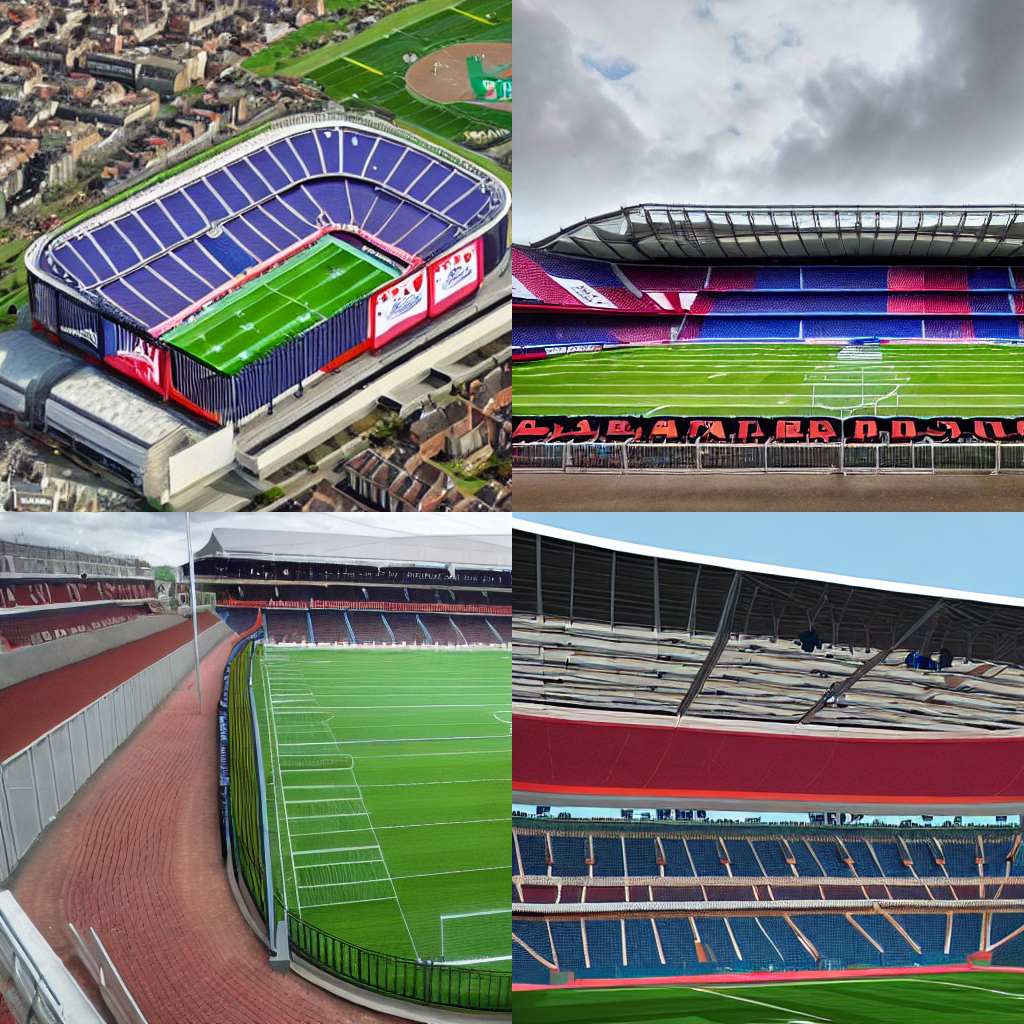

In [16]:
all_images = []
for _ in range(num_rows):
    images = pipeline(prompt, num_images_per_prompt=num_samples_per_row, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = make_image_grid(all_images, num_rows, num_samples_per_row)
grid

In [6]:
prompt = "a woman standing in front of a mountain"

num_samples_per_row = 2
num_rows = 2

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

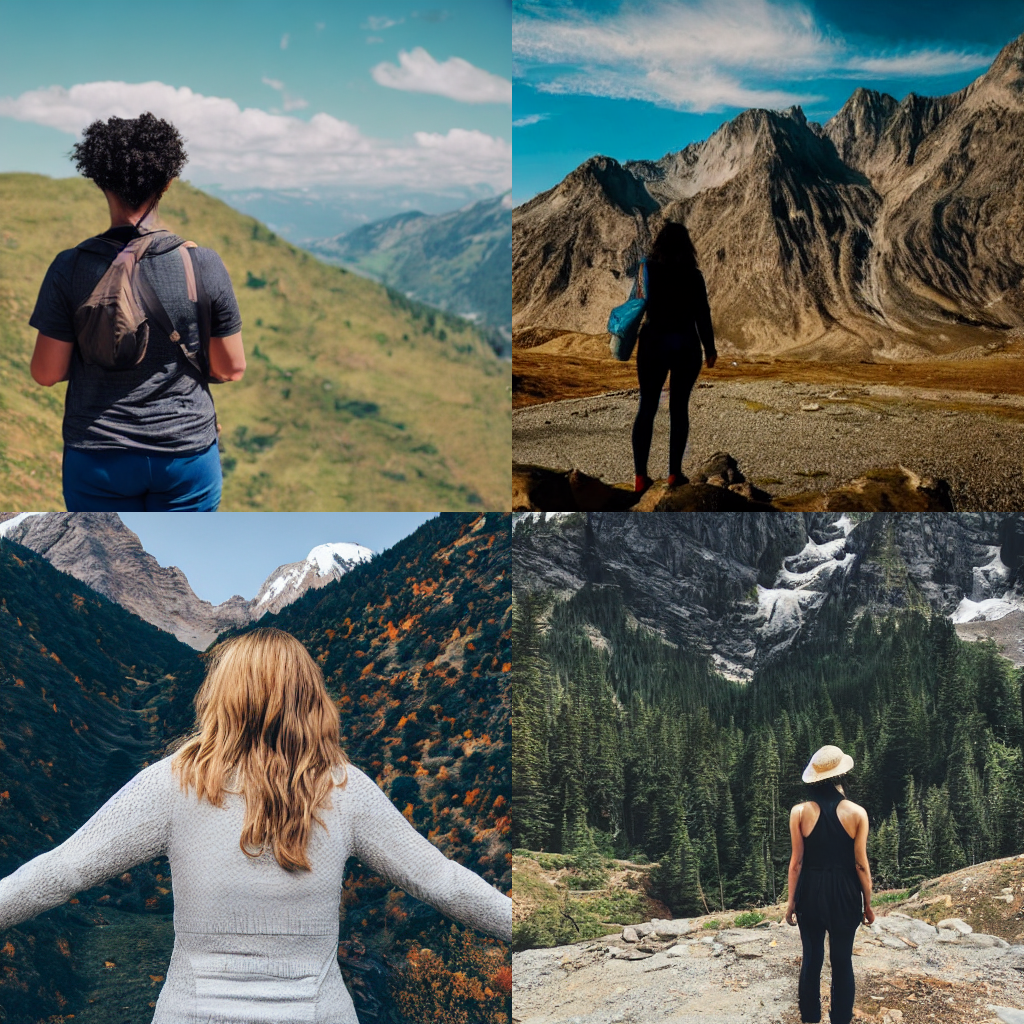

In [7]:
all_images = []
for _ in range(num_rows):
    images = pipeline(prompt, num_images_per_prompt=num_samples_per_row, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = make_image_grid(all_images, num_rows, num_samples_per_row)
grid

  0%|          | 0/100 [00:00<?, ?it/s]

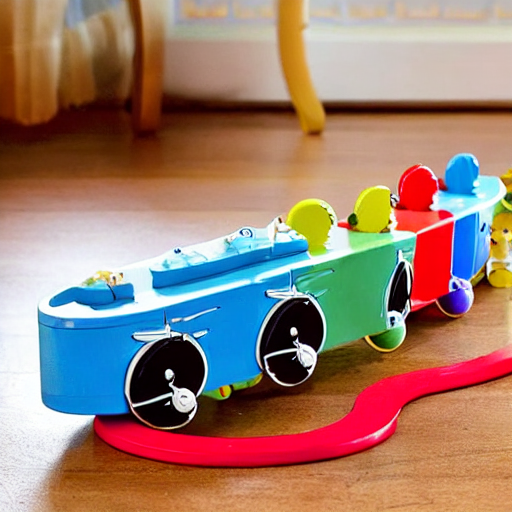

In [20]:
image = pipeline("A toy train designed for cats, with small interactive features, bright colors, and playful elements, created to entertain and engage cats in a fun and stimulating way.", num_inference_steps=100,  guidance_scale=7.5).images[0]
image